### Generate a quantum circuit from a adjacency matrix.
### Then use this circuit to judge if two vertexes are connected.

In [39]:
from funcs import *
from qiskit.circuit.library import MCXGate
from qiskit import ClassicalRegister
import numpy as np
import math

### generate data randomly

In [40]:
N = 6
Matrix = np.random.randint(2, size=(N, N))
print(Matrix)

[[0 1 0 0 1 1]
 [0 1 1 1 1 0]
 [0 1 0 0 1 0]
 [0 0 0 0 0 0]
 [1 0 0 1 0 0]
 [1 0 0 1 0 1]]


In [41]:
a = np.random.randint(0, N)
b = np.random.randint(0, N)

In [42]:
def dec2bin(num):
    num_bits = math.ceil(math.log2(N))
    binary_str = bin(num)[2:]
    binary_str_fixed = binary_str.zfill(num_bits)
    return binary_str_fixed

In [43]:
support_set = []
for i in range(N):
    for j in range(N):
        if Matrix[i][j] == 1:
            str = dec2bin(i) + dec2bin(j)
            support_set.append(str)
print(support_set)


['000001', '000100', '000101', '001001', '001010', '001011', '001100', '010001', '010100', '100000', '100011', '101000', '101011', '101101']


In [44]:
teststr = dec2bin(a) + dec2bin(b)
print(teststr)

000100


### Generate Quantum Circuits

In [45]:
def single_oracle(qc, str):
    n = len(str)
    if not (qc.num_qubits == n + 1):
        raise ValueError("qubit_num disagrees with string_length")
    for i in range(n):
        if str[i] == '0':
            qc.x(i)
    gate = MCXGate(n)
    qc.append(gate, range(n+1))
    for i in range(n):
        if str[i] == '0':
            qc.x(i)
    return qc

def oracle(qc, support_set):
    for str in support_set:
        qc = single_oracle(qc, str)
    return qc


### Set initial state

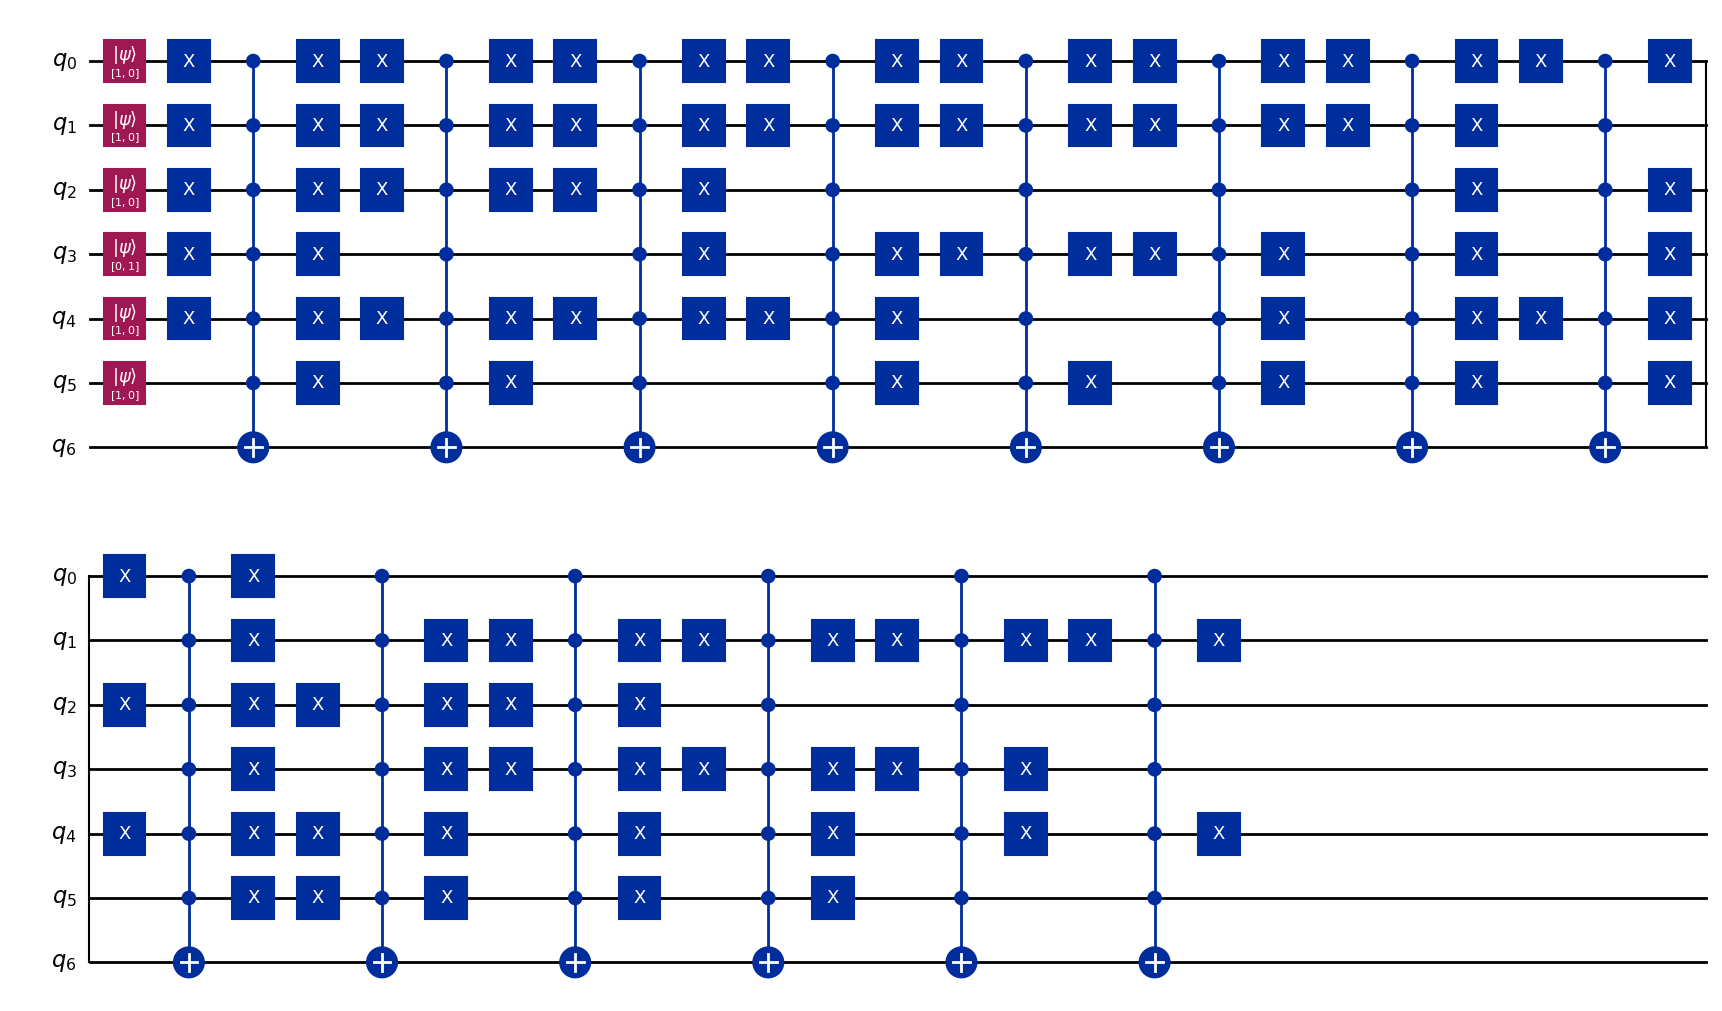

In [46]:
qc = QuantumCircuit(len(support_set[0])+1)
for i in range(len(teststr)):
    if teststr[i] == '1':
        qc.initialize([0,1], i)
    else:
        qc.initialize([1,0], i)
qc = oracle(qc, support_set)
qc.draw(output='mpl')

### Optimize and Measure

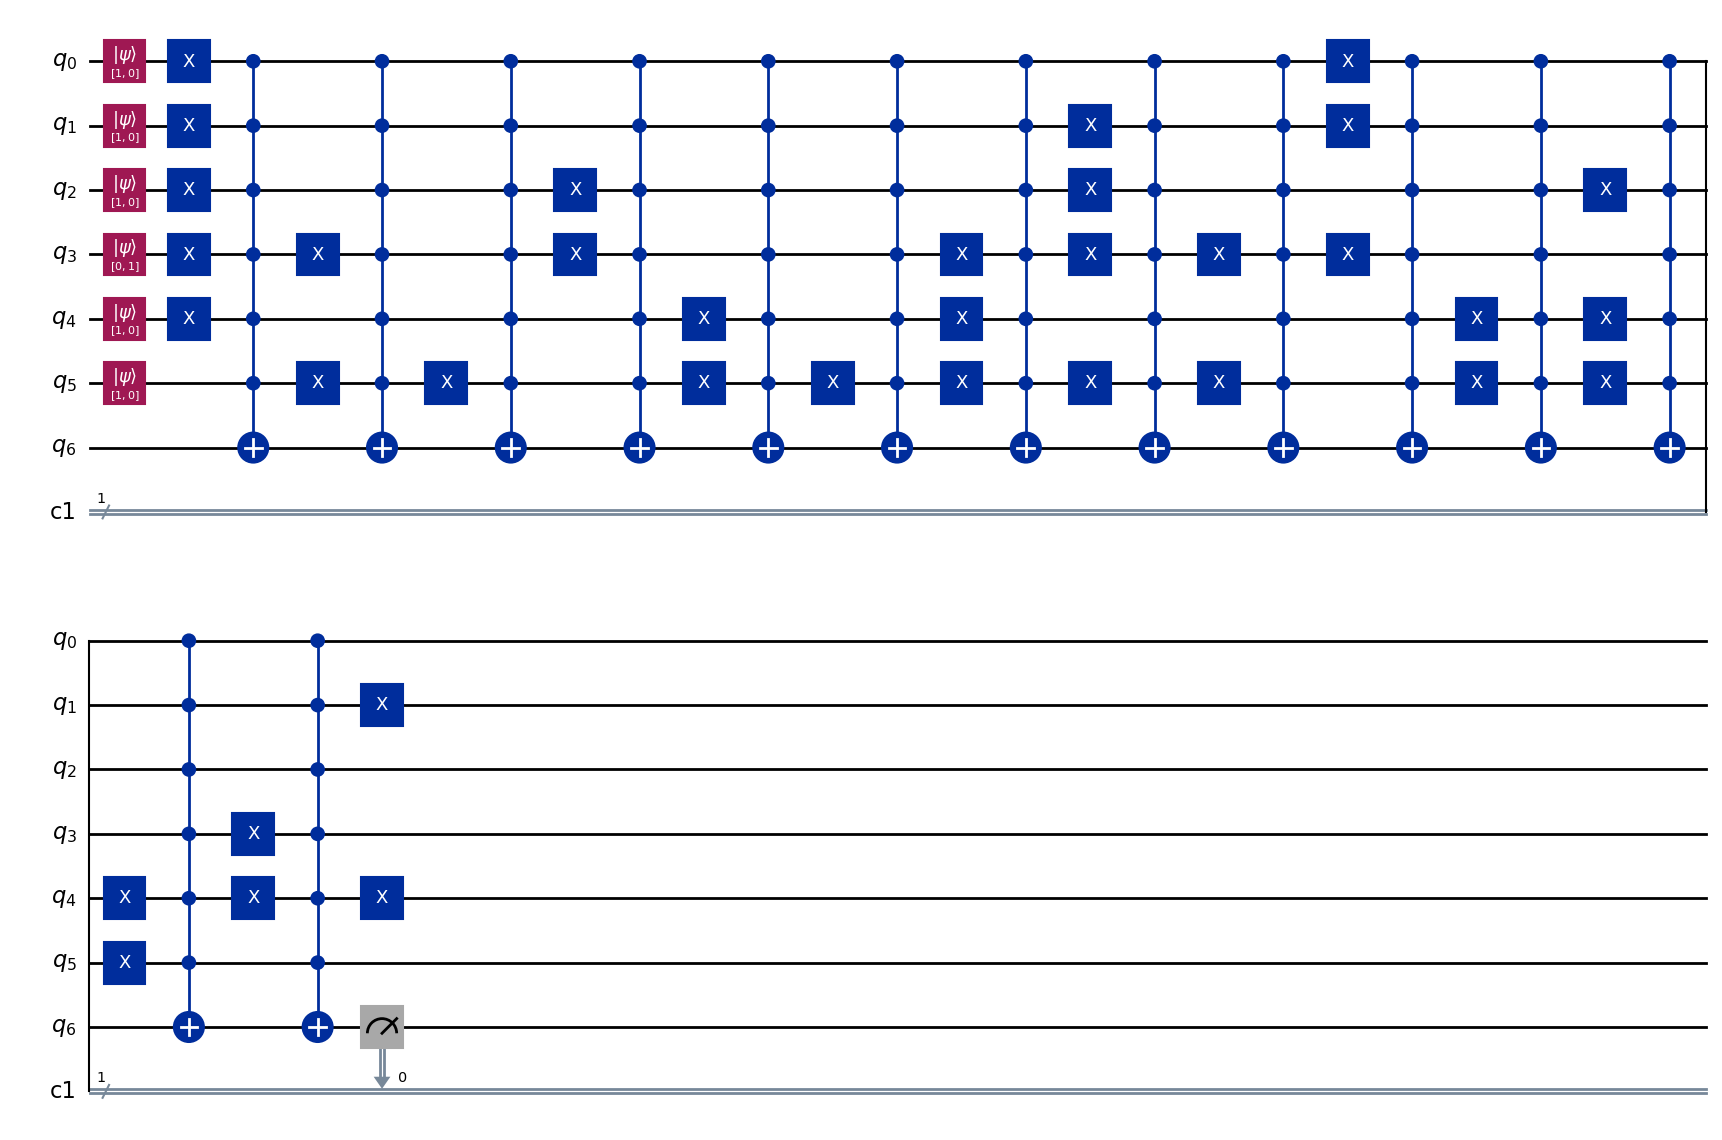

In [47]:
qc = transpile(qc, backend=AerSimulator(), optimization_level=3)
c = ClassicalRegister(1)
qc.add_register(c)
qc.measure(N, c[0])
qc.draw(output='mpl')

### Test 

In [48]:
print('a = ', a, '  b = ', b, '  Matrix[a][b] = ', Matrix[a][b])
results = execute_qc(qc)
print(results)

a =  0   b =  4   Matrix[a][b] =  1
{'1': 1024}
